# WeatherPy #
---

In [78]:
# Dependencies And Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint # Utilized For Indexing The OpenWeatherMap API JSON Data
from scipy.stats import linregress

# Import Personal OpenWeatherMap API Key From Python File 'api_keys.py'
from api_keys import weather_api_key

# Import CitiPy Library To Determine Cities Based On Latitude And Longitude
from citipy import citipy

### Geographic Coordinate & City List Generation ###

In [86]:
# Empty List Holding Latitude And Longitude Combinations
lat_lngs = []

# Empty List Holding City Names
cities = []

# Range Of Latitudes And Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create Set Of Random Latitude And Longitude Combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify Nearest City For Each Latitude And Longitude Combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If Identified City Is Unique, Add To Cities List
    if city not in cities:
        cities.append(city)

# Print City Count To Confirm Sufficient Count
print(f"Number of cities in the list: {len(cities)}")

# Print City List To Confirm Execution Of Code
print(cities)

Number of cities in the list: 605
['port-aux-francais', 'jamestown', 'zeya', 'hawaiian paradise park', 'utrik', 'udachny', 'hermanus', 'kapoeta', 'isafjordur', 'dapa', 'touros', 'bredasdorp', 'ushuaia', 'berdigestyakh', 'natal', 'bel ombre', 'tilcara', 'cidreira', 'olonkinbyen', 'papatowai', 'santa cruz', 'ulsteinvik', 'ribeira grande', 'taiohae', 'stanley', 'mogocha', 'grytviken', 'adamstown', 'goroka', 'fale old settlement', 'holualoa', 'le port', 'vadso', 'port alfred', 'nizhniy kuranakh', 'chernyshevskiy', 'carnarvon', 'castillos', 'waitangi', 'lluta', 'yermentau', 'port mathurin', 'beinamar', 'dudinka', 'trincomalee', 'kodiak', 'blackmans bay', 'puerto natales', 'uturoa', 'totness', 'shache', 'masterton', 'el calafate', 'sheksna', 'tapejara', 'saint-philippe', 'avarua', 'cockburn town', "st. john's", 'atafu village', 'nabire', 'cochirleanca', 'newman', 'aasiaat', 'daru', 'titao', 'port elizabeth', 'petropavlovsk-kamchatsky', 'khandyga', 'dalandzadgad', 'college', 'iskushuban', 'co

### Use OpenWeatherMap API to Retrieve Weather Data for Generated Cities ###

In [87]:
# OpenWeatherMap Current Weather Data API Base URL
base_url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define Empty List To Contain Fetched Weather Data For Each City
city_data = []

# Print Message Indicating Start Of Data Retrieval To Logger
print('Beginning Data Retrieval')
print('-----------------------------')

# Create Counters, Used For Dividing Cities List Into Sets Of 50 Cities
record_count = 1
set_count = 1

# Loop Through All Cities In Cities List To Fetch Weather Data For Each City
for i, city in enumerate(cities):
        
    # Group Cities Into Sets Of 50 For Logging Purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create Endpoint URL With Each City Included
    city_url = base_url + 'q={}&appid={}&units=metric'.format(city, weather_api_key)
    
    # Log URL, Record, And Set Numbers
    print('Processing Record %s of Set %s | %s' % (record_count, set_count, city))

    # Add 1 To Record Count, For Next City Weather Data Retrieval
    record_count += 1

    # Run API Request For Each City
    try:
        # API Request
        city_weather = requests.get(city_url).json()

        # Parse JSON For Latitude, Longitude, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append City Information To city_data List
        city_data.append({"City": city, 
                          "Latitude": city_lat, 
                          "Longitude": city_lng, 
                          "Maximum Temperature (°C)": city_max_temp,
                          "Humidity (%)": city_humidity,
                          "Cloudiness (%)": city_clouds,
                          "Wind Speed (m/s)": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # In Case Error Is Experienced, Skip City Causing Error
    except:
        print("City not found. Skipping...")
        pass
              
# Indication That Data Loading Is Complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | zeya
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | utrik
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | kapoeta
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | dapa
Processing Record 11 of Set 1 | touros
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | berdigestyakh
Processing Record 15 of Set 1 | natal
Processing Record 16 of Set 1 | bel ombre
Processing Record 17 of Set 1 | tilcara
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | santa cruz
Processing Record 22 of Set 1 | ulsteinvik
Processing Record 23 of Set 1 

In [168]:
# Convert City Weather Data Into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City                        583
Latitude                    583
Longitude                   583
Maximum Temperature (°C)    583
Humidity (%)                583
Cloudiness (%)              583
Wind Speed (m/s)            583
Country                     583
Date                        583
dtype: int64

In [131]:
# Display DataFrame Sample Data
city_data_df.head()

,City,Latitude,Longitude,Maximum Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
0,port-aux-francais,-49.3500,70.2167,5.70,76,59,11.85,TF,1708796841
1,jamestown,42.0970,-79.2353,-1.38,49,55,0.45,US,1708796842
2,zeya,53.7500,127.2667,-25.29,100,78,1.48,RU,1708796842
3,hawaiian paradise park,19.5933,-154.9731,20.50,85,20,2.57,US,1708796842
4,utrik,11.2278,169.8474,25.32,80,100,7.84,MH,1708796842


In [132]:
# Export City_Data DataFrame Into csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [133]:
# Read Saved Data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display Sample Data
city_data_df.head()

,City,Latitude,Longitude,Maximum Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.70,76,59,11.85,TF,1708796841
1,jamestown,42.0970,-79.2353,-1.38,49,55,0.45,US,1708796842
2,zeya,53.7500,127.2667,-25.29,100,78,1.48,RU,1708796842
3,hawaiian paradise park,19.5933,-154.9731,20.50,85,20,2.57,US,1708796842
4,utrik,11.2278,169.8474,25.32,80,100,7.84,MH,1708796842


### Function Creation for Scatter Plots ###

In [119]:
# Function To Create Scatter Plots
def scatter(df, x_column, y_column, count):
    x = df[x_column]
    y = df[y_column]
    plt.scatter(x=x,
                y=y,
                s=40,
                color='steelblue',
                edgecolors='black')
    scatter_title = f"{x_column} vs. {y_column} Per City\n"
    scatter_x_label = f"\n{x_column}"
    scatter_y_label = f"{y_column}\n"
    plt.title(scatter_title)
    plt.xlabel(scatter_x_label)
    plt.ylabel(scatter_y_label)
    plt.grid()
    figure_path = f"output_data/Fig{count}.png"
    plt.savefig(figure_path)
    plt.show()

### Latitude vs. Temperature Scatter Plot ###

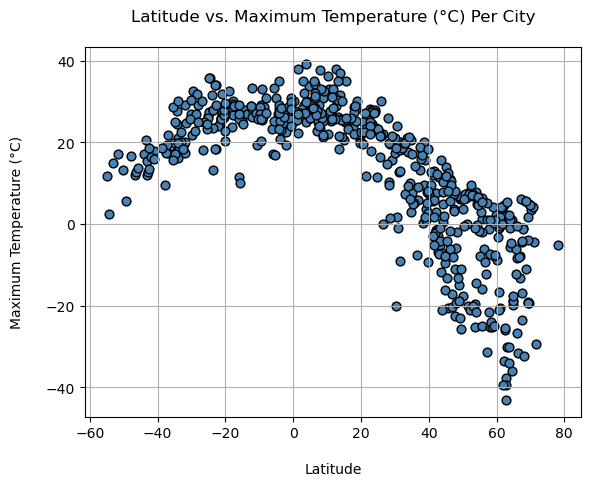

In [123]:
# Scatter Plot For Latitude vs. Maximum Temperature (°C) Per City
scatter(city_data_df, 'Latitude', 'Maximum Temperature (°C)', 1)

### Latitude vs. Humidity Scatter Plot ###

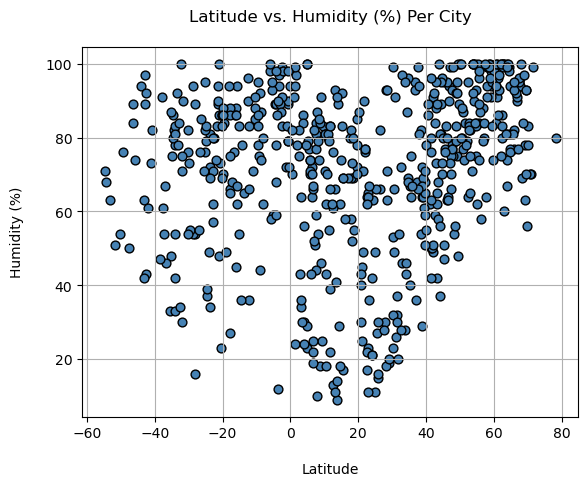

In [124]:
# Scatter Plot For Latitude vs. Humidity (%) Per City
scatter(city_data_df, 'Latitude', 'Humidity (%)', 2)

### Latitude vs. Cloudiness Scatter Plot ###

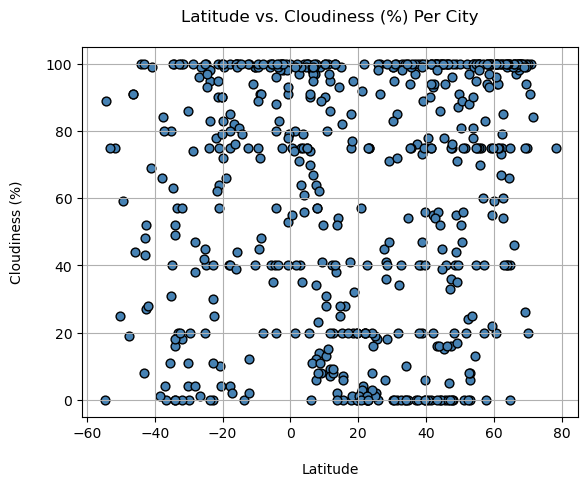

In [125]:
# Scatter Plot For Latitude vs. Cloudiness (%) Per City
scatter(city_data_df, 'Latitude', 'Cloudiness (%)', 3)

### Latitude vs. Wind Speed Scatter Plot ###

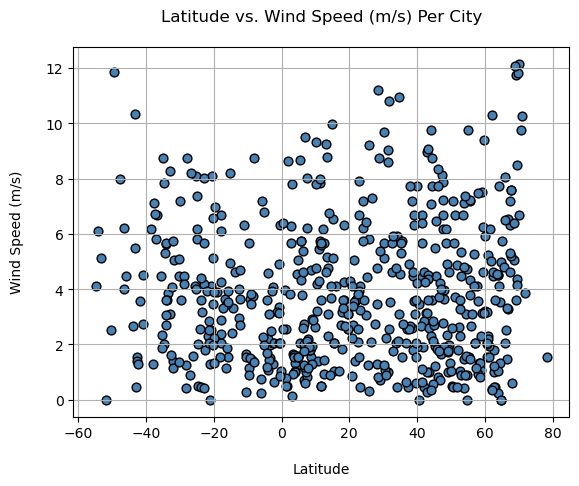

In [126]:
# Scatter Plot For Latitude vs. Wind Speed (m/s) Per City
scatter(city_data_df, 'Latitude', 'Wind Speed (m/s)', 4)

### Function Creation for Linear Regression ###

In [147]:
# Function To Create Linear Regression Plots
def linear_regression(df, x_column, y_column, hemisphere):
    x = df[x_column]
    y = df[y_column]
    plt.scatter(x=x,
                y=y,
                s=40,
                color='steelblue',
                edgecolors='black')
    scatter_title = f"{x_column} vs. {y_column} Per {hemisphere} City\n"
    scatter_x_label = f"\n{x_column}"
    scatter_y_label = f"{y_column}\n"
    plt.title(scatter_title)
    plt.xlabel(scatter_x_label)
    plt.ylabel(scatter_y_label)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.plot(x,regress_values,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The Pearson correlation coefficient (r) is: {rvalue: .2f}")
    print(f"The p-value is: {pvalue: .2f}")
    print(f"The coefficient of determination is: {rvalue**2: .2f}")
    print(f"The standard error of the estimated slope is: {stderr: .2f}")
    return line_eq

In [169]:
# Creation Of DataFrame With Northern Hemisphere Data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Latitude'] >= 0, :]

# Display Northern Hemisphere DataFrame
northern_hemi_df.head()

,City,Latitude,Longitude,Maximum Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
1,jamestown,42.0970,-79.2353,-1.38,49,55,0.45,US,1708796842
2,zeya,53.7500,127.2667,-25.29,100,78,1.48,RU,1708796842
3,hawaiian paradise park,19.5933,-154.9731,20.50,85,20,2.57,US,1708796842
4,utrik,11.2278,169.8474,25.32,80,100,7.84,MH,1708796842
5,udachny,66.4167,112.4000,-31.61,95,97,1.49,RU,1708796843


In [170]:
# Creation Of DataFrame With Southern Hemisphere Data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Latitude'] < 0, :]

# Display Southern Hemisphere DataFrame
southern_hemi_df.head()

,City,Latitude,Longitude,Maximum Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
0,port-aux-francais,-49.3500,70.2167,5.70,76,59,11.85,TF,1708796841
6,hermanus,-34.4187,19.2345,17.60,82,100,5.32,ZA,1708796843
10,touros,-5.1989,-35.4608,30.86,59,35,6.81,BR,1708796844
11,bredasdorp,-34.5322,20.0403,17.06,86,100,7.86,ZA,1708796845
12,ushuaia,-54.8000,-68.3000,11.81,71,0,4.12,AR,1708796845


###  Latitude vs. Maximum Temperature Linear Regression Plot ###

The Pearson correlation coefficient (r) is: -0.83
The p-value is:  0.00
The coefficient of determination is:  0.69
The standard error of the estimated slope is:  0.02


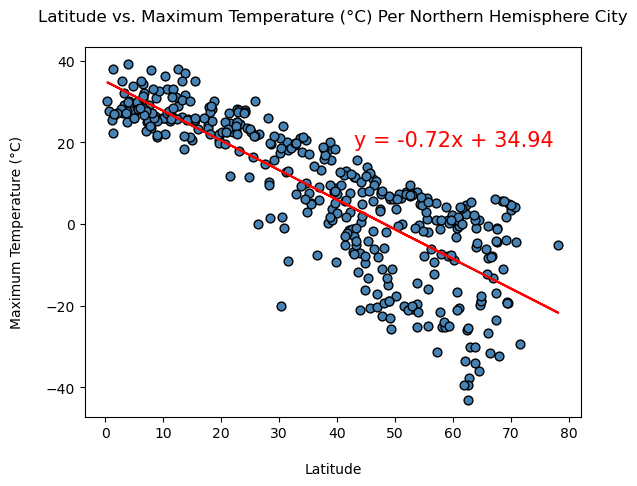

In [150]:
# Linear Regression For Northern Hemisphere City Latitude vs. Maximum Temperature (°C)
line_eq = linear_regression(northern_hemi_df,
                            'Latitude',
                            'Maximum Temperature (°C)',
                            'Northern Hemisphere')
plt.annotate(line_eq,(43,19),fontsize=15,color="red")

# Show Plot
plt.show()

The Pearson correlation coefficient (r) is:  0.57
The p-value is:  0.00
The coefficient of determination is:  0.32
The standard error of the estimated slope is:  0.03


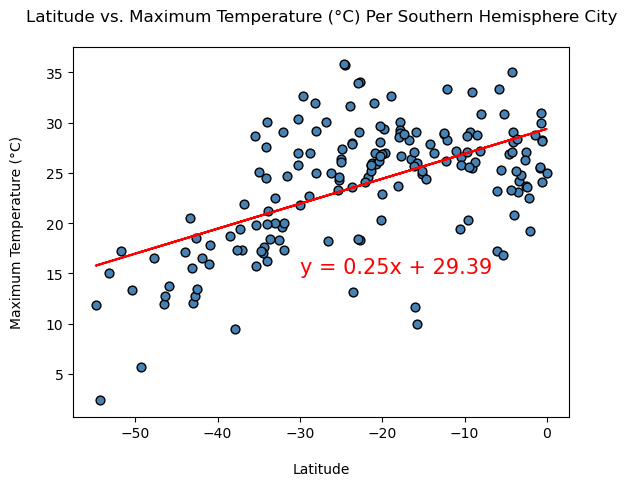

In [155]:
# Linear Regression For Southern Hemisphere City Latitude vs. Maximum Temperature (°C)
line_eq = linear_regression(southern_hemi_df,
                            'Latitude',
                            'Maximum Temperature (°C)',
                            'Southern Hemisphere')
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")

# Show Plot
plt.show()

**Discussion about the Linear Relationship:**

- Northern Hemishpere Cities:
  - Pearson correlation coefficient (r) = -0.83:
    - The correlation coefficient indicates a stronger negative linear relationship between Latitude and Maximum Temperature (°C).
  - p-value = 0.00:
    - The p-value is extremely small, indicating that the correlation observed is statistically significant.
  - Coefficient of determination (r^2) = 0.69:
    - 69% of the variability in Maximum Temperature (°C) is explained by Latitude. This indicates a stronger level of predictability.
  - Standard error of the estimated slope = 0.02:
    - The lower standard error suggests a more precise estimate of the slope of the regression line. This indicates that the regression line is a good fit for the data and provides a reliable estimate of the relationship between the variables.

- Southern Hemishpere Cities:
  - Pearson correlation coefficient (r) = 0.57:
    - The correlation coefficient indicates a moderate positive linear relationship between Latitude and Maximum Temperature (°C).
  - p-value = 0.00:
    - The p-value is extremely small, indicating that the correlation observed is statistically significant.
  - Coefficient of determination (r^2) = 0.32:
    - 32% of the variability in Maximum Temperature (°C) is explained by Latitude. This indicates a moderate level of predictability.
  - Standard error of the estimated slope = 0.03:
    - The lower standard error suggests a more precise estimate of the slope of the regression line. This indicates that the regression line is a good fit for the data and provides a reliable estimate of the relationship between the variables.

### Latitude vs. Humidity Linear Regression Plot

The Pearson correlation coefficient (r) is:  0.46
The p-value is:  0.00
The coefficient of determination is:  0.22
The standard error of the estimated slope is:  0.05


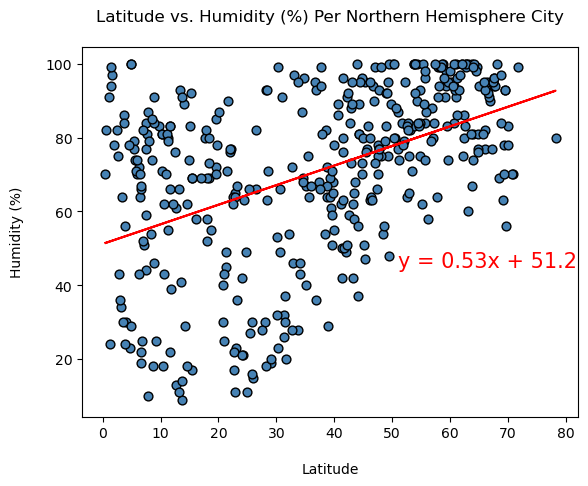

In [163]:
# Linear Regression For Northern Hemisphere City Latitude vs. Humidity (%)
line_eq = linear_regression(northern_hemi_df,
                            'Latitude',
                            'Humidity (%)',
                            'Northern Hemisphere')
plt.annotate(line_eq,(51,45),fontsize=15,color="red")

# Show Plot
plt.show()

The Pearson correlation coefficient (r) is:  0.26
The p-value is:  0.00
The coefficient of determination is:  0.07
The standard error of the estimated slope is:  0.10


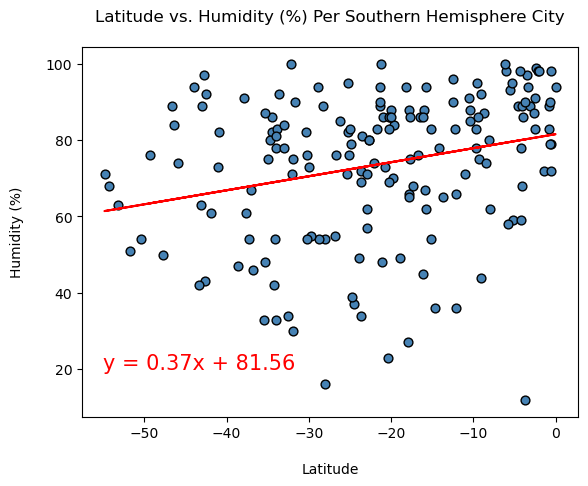

In [174]:
# Linear Regression For Southern Hemisphere City Latitude vs. Humidity (%)
line_eq = linear_regression(southern_hemi_df,
                            'Latitude',
                            'Humidity (%)',
                            'Southern Hemisphere')
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Show Plot
plt.show()

**Discussion about the Linear Relationship:**

- Northern Hemishpere Cities:
  - Pearson correlation coefficient (r) = 0.46:
    - The correlation coefficient indicates a moderate positive linear relationship between Latitude and Humidity (%).
  - p-value = 0.00:
    - The p-value is extremely small, indicating that the correlation observed is statistically significant.
  - Coefficient of determination (r^2) = 0.22:
    - 22% of the variability in Humidity (%) is explained by Latitude. This indicates a weaker level of predictability.
  - Standard error of the estimated slope = 0.05:
    - The lower standard error suggests a more precise estimate of the slope of the regression line. This indicates that the regression line is a good fit for the data and provides a reliable estimate of the relationship between the variables.

- Southern Hemishpere Cities:
  - Pearson correlation coefficient (r) = 0.26:
    - The correlation coefficient indicates a weaker positive linear relationship between Latitude and Humidity (%).
  - p-value = 0.00:
    - The p-value is extremely small, indicating that the correlation observed is statistically significant.
  - Coefficient of determination (r^2) = 0.07:
    - 7% of the variability in Humidity (%) is explained by Latitude. This indicates a weaker level of predictability.
  - Standard error of the estimated slope = 0.10:
    - The lower standard error suggests a more precise estimate of the slope of the regression line. This indicates that the regression line is a good fit for the data and provides a reliable estimate of the relationship between the variables.

### Latitude vs. Cloudiness Linear Regression Plot

The Pearson correlation coefficient (r) is:  0.25
The p-value is:  0.00
The coefficient of determination is:  0.06
The standard error of the estimated slope is:  0.09


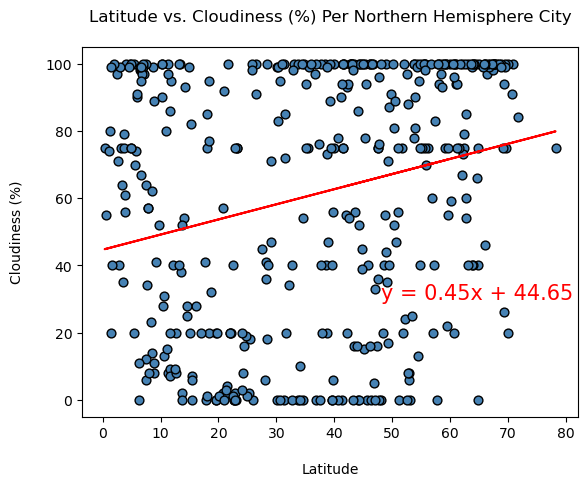

In [179]:
# Linear Regression For Northern Hemisphere City Latitude vs. Cloudiness (%)
line_eq = linear_regression(northern_hemi_df,
                            'Latitude',
                            'Cloudiness (%)',
                            'Northern Hemisphere')
plt.annotate(line_eq,(48,30),fontsize=15,color="red")

# Show Plot
plt.show()

The Pearson correlation coefficient (r) is:  0.32
The p-value is:  0.00
The coefficient of determination is:  0.10
The standard error of the estimated slope is:  0.18


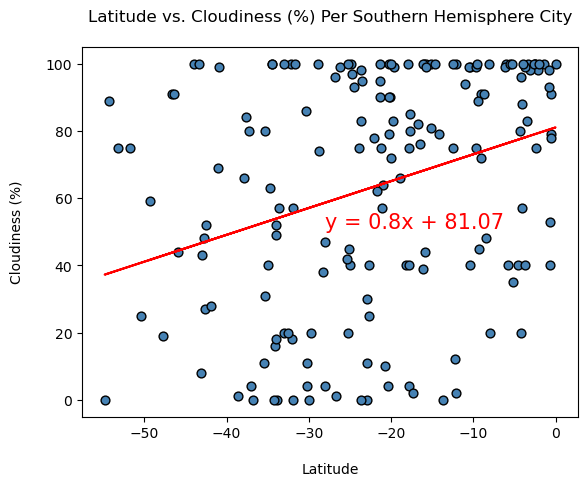

In [186]:
# Linear Regression For Southern Hemisphere City Latitude vs. Cloudiness (%)
line_eq = linear_regression(southern_hemi_df,
                            'Latitude',
                            'Cloudiness (%)',
                            'Southern Hemisphere')
plt.annotate(line_eq,(-28,51),fontsize=15,color="red")

# Show Plot
plt.show()

**Discussion about the Linear Relationship:**

- Northern Hemishpere Cities:
  - Pearson correlation coefficient (r) = 0.25:
    - The correlation coefficient indicates a weaker positive linear relationship between Latitude and Cloudiness (%).
  - p-value = 0.00:
    - The p-value is extremely small, indicating that the correlation observed is statistically significant.
  - Coefficient of determination (r^2) = 0.06:
    - 6% of the variability in Cloudiness (%) is explained by Latitude. This indicates a weaker level of predictability.
  - Standard error of the estimated slope = 0.09:
    - The lower standard error suggests a more precise estimate of the slope of the regression line. This indicates that the regression line is a good fit for the data and provides a reliable estimate of the relationship between the variables.

- Southern Hemishpere Cities:
  - Pearson correlation coefficient (r) = 0.32:
    - The correlation coefficient indicates a moderate positive linear relationship between Latitude and Cloudiness (%).
  - p-value = 0.00:
    - The p-value is extremely small, indicating that the correlation observed is statistically significant.
  - Coefficient of determination (r^2) = 0.10:
    - 10% of the variability in Cloudiness (%) is explained by Latitude. This indicates a weaker level of predictability.
  - Standard error of the estimated slope = 0.18:
    - The lower standard error suggests a more precise estimate of the slope of the regression line. This indicates that the regression line is a good fit for the data and provides a reliable estimate of the relationship between the variables.

### Latitude vs. Wind Speed Linear Regression Plot

The Pearson correlation coefficient (r) is:  0.09
The p-value is:  0.08
The coefficient of determination is:  0.01
The standard error of the estimated slope is:  0.01


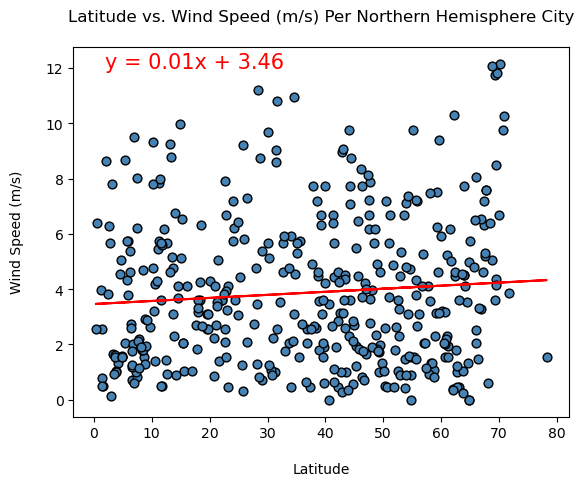

In [187]:
# Linear Regression For Northern Hemisphere City Latitude vs. Wind Speed (m/s)
line_eq = linear_regression(northern_hemi_df,
                            'Latitude',
                            'Wind Speed (m/s)',
                            'Northern Hemisphere')
plt.annotate(line_eq,(2,12),fontsize=15,color="red")

# Show Plot
plt.show()

The Pearson correlation coefficient (r) is: -0.27
The p-value is:  0.00
The coefficient of determination is:  0.07
The standard error of the estimated slope is:  0.01


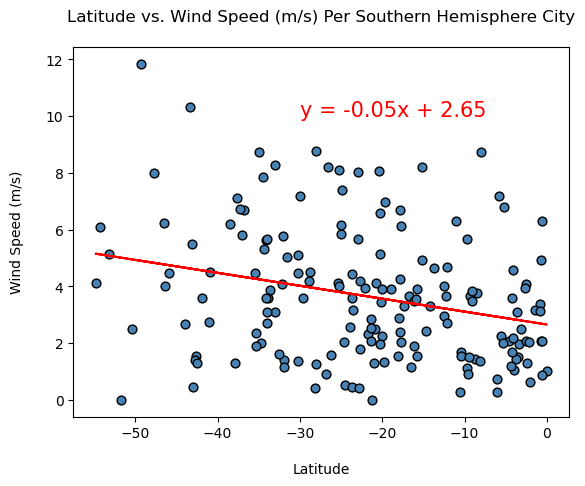

In [188]:
# Linear Regression For Southern Hemisphere City Latitude vs. Wind Speed (m/s)
line_eq = linear_regression(southern_hemi_df,
                            'Latitude',
                            'Wind Speed (m/s)',
                            'Southern Hemisphere')
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Show Plot
plt.show()

**Discussion about the linear relationship:**

- Northern Hemishpere Cities:
  - Pearson correlation coefficient (r) = 0.09:
    - The correlation coefficient indicates a weaker positive linear relationship between Latitude and Wind Speed (m/s).
  - p-value = 0.08:
    - The p-value is high, indicating that the correlation observed is not statistically significant. Instead, the null hypothesis cannot be rejected, which indicates that there is no correlation between Latitude and Wind Speed (m/s).
  - Coefficient of determination (r^2) = 0.01:
    - 1% of the variability in Wind Speed (m/s) is explained by Latitude. This indicates a weaker level of predictability.
  - Standard error of the estimated slope = 0.01:
    - The lower standard error suggests a more precise estimate of the slope of the regression line. This indicates that the regression line is a good fit for the data and provides a reliable estimate of the relationship between the variables.

- Southern Hemishpere Cities:
  - Pearson correlation coefficient (r) = -0.27:
    - The correlation coefficient indicates a weaker negative linear relationship between Latitude and Wind Speed (m/s).
  - p-value = 0.00:
    - The p-value is extremely small, indicating that the correlation observed is statistically significant.
  - Coefficient of determination (r^2) = 0.07:
    - 7% of the variability in Wind Speed (m/s) is explained by Latitude. This indicates a weaker level of predictability.
  - Standard error of the estimated slope = 0.01:
    - The lower standard error suggests a more precise estimate of the slope of the regression line. This indicates that the regression line is a good fit for the data and provides a reliable estimate of the relationship between the variables.